<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Clustering_Algorithms/Clusterinng_Algoritham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Algoritham

Clustering algorithms in machine learning are unsupervised learning techniques that group unlabeled data points into clusters based on their similarity, identifying natural groupings and patterns without predefined categories.

Key types include K-Means (centroid-based), Hierarchical clustering, Density-based clustering (like DBSCAN), and Distribution-based clustering (like Gaussian Mixture Models).

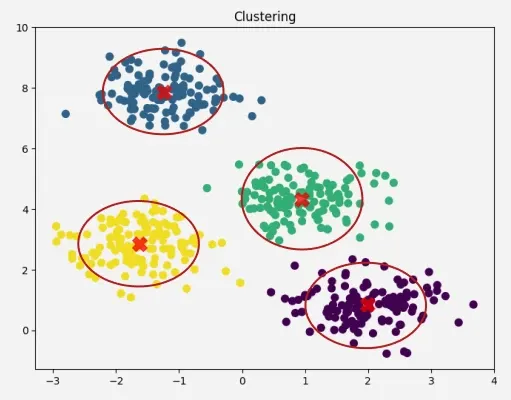


## **Types of Clustering Algorithms**



### **Partitioning-Based Clustering**

1. **K-Means Clustering**

   * **Idea:** Partition data into `k` clusters by minimizing the variance within clusters.
   * **Steps:**

     1. Choose `k` initial centroids randomly.
     2. Assign each data point to the nearest centroid.
     3. Recalculate centroids as the mean of points in each cluster.
     4. Repeat until convergence.
   * **Pros:** Simple, scalable, works well for spherical clusters.
   * **Cons:** Requires `k` to be known, sensitive to outliers, struggles with irregular-shaped clusters.

2. **K-Medoids (PAM – Partitioning Around Medoids)**

   * Similar to K-Means but uses actual data points (medoids) as cluster centers, making it more robust to outliers.



### **Hierarchical Clustering**

* Builds a hierarchy of clusters (tree-like structure).
* Two main types:

  1. **Agglomerative (Bottom-Up):** Start with individual points as clusters and iteratively merge closest pairs until one big cluster remains.
  2. **Divisive (Top-Down):** Start with one big cluster and recursively split into smaller clusters.
* **Output:** A dendrogram (tree diagram) showing cluster relationships.
* **Pros:** No need to specify `k` beforehand, good for hierarchical data.
* **Cons:** Computationally expensive for large datasets.



### **Density-Based Clustering**

1. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

   * Groups points that are close enough (density-connected) into clusters.
   * Points in low-density areas are considered noise/outliers.
   * **Parameters:**

     * `eps` – radius to search for neighbors
     * `minPts` – minimum points required to form a dense region
   * **Pros:** Finds arbitrarily shaped clusters, robust to noise.
   * **Cons:** Choosing `eps` and `minPts` can be tricky.

2. **OPTICS (Ordering Points To Identify Clustering Structure)**

   * Extension of DBSCAN that handles varying densities more effectively.



### **Model-Based Clustering**

1. **Gaussian Mixture Models (GMM)**

   * Assumes data is generated from a mixture of Gaussian distributions.
   * Uses **Expectation-Maximization (EM)** algorithm to estimate parameters.
   * Produces soft clustering (each point has a probability of belonging to each cluster).
   * **Pros:** Handles overlapping clusters well.
   * **Cons:** Assumes Gaussian distribution, sensitive to initialization.



### **Grid-Based Clustering**

* Divides space into a finite number of cells (grid structure).
* Examples: **STING, CLIQUE**
* **Pros:** Fast processing.
* **Cons:** Works well only in low-dimensional spaces.



### **Applications**

* **Customer Segmentation:** Grouping users based on purchasing behavior.

* **Anomaly Detection:** Detecting fraud or network intrusions.

* **Image Compression:** Clustering similar colors.

* **Document Clustering:** Organizing articles by topics.

### **Use Cases**
* **Customer Segmentation:** Grouping customers based on behavior or demographics for targeted marketing and personalized services.

* **Anomaly Detection:** Identifying outliers or fraudulent activities in finance, network security and sensor data.

* **Image Segmentation:** Dividing images into meaningful parts for object detection, medical diagnostics or computer vision tasks.

* **Recommendation Systems:** Clustering user preferences to recommend movies, products or content tailored to different groups.

* **Market Basket Analysis:** Discovering products frequently bought together to optimize store layouts and promotions.


## **Distance Measures**

### **A. Euclidean Distance**

Most commonly used (straight-line distance).
For two points **A(x₁, y₁)** and **B(x₂, y₂):**

$$
d_{E}(A, B) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

* **Pros:** Intuitive, simple, works well in low-dimensional numeric data.
* **Cons:** Sensitive to scale and outliers.



### **B. Manhattan Distance (L₁ Norm / Taxicab Distance)**

Distance measured along axes (like grid blocks in a city).

$$
d_{M}(A, B) = |x_1 - x_2| + |y_1 - y_2|
$$

* **Pros:** More robust to outliers, useful when diagonal movement not allowed.
* **Cons:** Can distort distance when features are correlated.



### **C. Minkowski Distance**

Generalization of Euclidean & Manhattan distances:

$$
d_{p}(A, B) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}
$$

* For `p=1` → Manhattan Distance
* For `p=2` → Euclidean Distance
* Flexible for different values of `p`.



### **D. Cosine Similarity (and Distance)**

Measures **angle** between two vectors rather than magnitude.

$$
\text{Cosine Similarity} =
\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$

Cosine Distance:

$$
d_{cos}(A,B) = 1 - \text{Cosine Similarity}
$$

* **Best for:** Text data (TF-IDF vectors), high-dimensional sparse data.
* **Pros:** Ignores magnitude, focuses on orientation.



### **E. Mahalanobis Distance**

Accounts for correlations between features:

$$
d_{Mahalanobis}(A,B) = \sqrt{(A-B)^T \, S^{-1} \, (A-B)}
$$

Where **S** = covariance matrix.

* **Pros:** Good for data with correlated features.
* **Cons:** Requires covariance matrix (expensive for large datasets).



### **F. Hamming Distance**

Counts number of positions where two vectors differ.

$$
d_{Ham}(A,B) = \sum_{i=1}^{n} [A_i \neq B_i]
$$

* **Best for:** Categorical or binary data.



### **G. Jaccard Distance**

Used for sets or binary data.
Measures dissimilarity based on intersection and union:

$$
\text{Jaccard Similarity} =
\frac{|A \cap B|}{|A \cup B|}
$$

$$
\text{Jaccard Distance} = 1 - \text{Jaccard Similarity}
$$




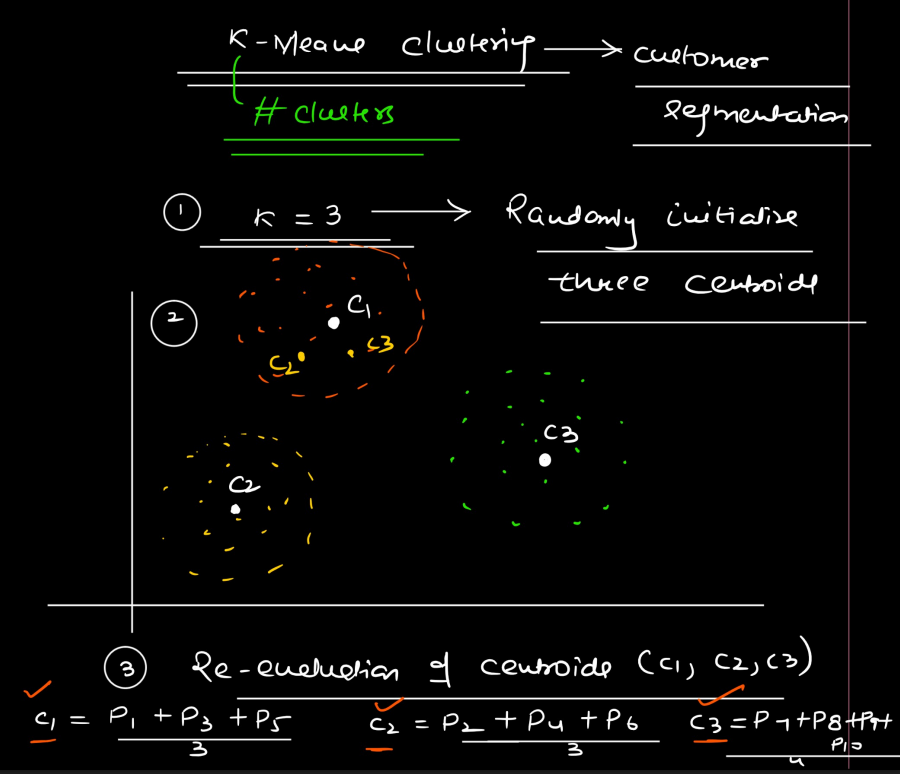



# **K-Means Clustering**



K-Means is a **partition-based, unsupervised clustering algorithm**.
Its goal is to divide `n` data points into `k` clusters such that each data point belongs to the cluster with the nearest mean (called **centroid**).

* **K** = number of clusters you want.
* **Means** = average value of data points within a cluster (used to calculate centroids).



## **How It Works (Algorithm Steps)**

### **Step-by-Step Procedure**

1. **Choose K:**
   Decide the number of clusters `k`.

2. **Initialize Centroids:**
   Randomly pick `k` data points as initial centroids.

3. **Assign Points:**
   For each data point, calculate distance to each centroid (usually Euclidean) and assign it to the nearest cluster.

4. **Update Centroids:**
   Calculate the new centroid of each cluster as the **mean** of all points in that cluster.

5. **Repeat Steps 3 & 4:**
   Until centroids do not change (or change is very small) → **convergence**.


### **k-means++**  
selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the basic k-means by making several trials at each sampling step and choosing the best centroid among them.

# Clustering Algoritham Implement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# Generate the synthetic data

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [4]:
X

array([[ -9.1139443 ,   6.81361629],
       [ -9.35457578,   7.09278959],
       [ -2.01567068,   8.28177994],
       [ -7.01023591,  -6.22084348],
       [-10.06120248,   6.71867113],
       [ -6.36503142,  -6.97607271],
       [  4.74378739,   2.20436011],
       [ -6.63186832,  -7.21834432],
       [ -2.79670217,   8.90289074],
       [  3.92509674,   2.36710185],
       [ -2.87022159,  10.12565304],
       [  4.85408813,   1.55742393],
       [ -2.38387947,   7.83848405],
       [ -3.35842007,   8.76189893],
       [ -9.2287133 ,   7.03124769],
       [ -2.93042948,   8.81768884],
       [ -9.81485322,   7.35237388],
       [  3.42479328,   2.08504227],
       [ -2.45095109,   9.59547312],
       [ -2.15708337,  10.3285595 ],
       [  5.33503618,   1.48076029],
       [ -2.60596905,   9.25671664],
       [ -6.29455535,  -6.96834402],
       [ -8.90572459,   7.19094116],
       [ -2.78724824,   8.73484828],
       [ -8.52044525,   8.18846409],
       [ -9.18439055,   7.77675765],
 

In [5]:
inertia = []
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

print(inertia)


[19652.39537162307, 9712.89441849877, 1773.7368661265266, 203.89074684058335, 186.48148196351914, 167.1154123049453, 148.637098800162, 131.2667020810383, 120.79296111860671, 109.89681152885022]


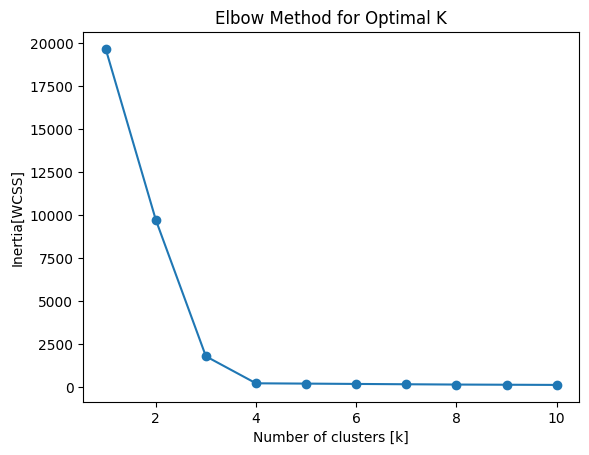

In [8]:
# plot the Elbow curve

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters [k]')
plt.ylabel('Inertia[WCSS]')
plt.title('Elbow Method for Optimal K')
plt.show()

In [12]:
# Model Training KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
print(labels)

[1 1 1 2 1 2 0 2 1 0 1 0 1 1 1 1 1 0 1 1 0 1 2 1 1 1 1 2 2 0 1 0 1 0 1 1 1
 2 1 2 0 1 1 2 1 1 1 0 1 0 2 1 2 1 2 0 1 0 0 1 1 0 0 1 2 2 2 2 2 1 2 2 1 0
 1 1 2 2 1 2 1 1 1 1 2 1 1 0 0 0 1 1 1 1 1 1 2 1 1 1 0 0 0 1 1 1 1 1 2 1 0
 1 1 1 1 0 1 2 1 2 2 2 1 1 2 1 1 1 1 2 0 1 1 1 1 0 0 1 1 2 1 0 2 1 0 0 0 0
 2 1 1 1 0 2 1 0 2 1 1 0 1 1 2 1 0 1 2 1 1 1 1 1 2 0 0 2 2 0 0 2 1 1 1 0 0
 1 2 1 0 0 2 2 2 1 0 2 2 0 0 1 1 1 2 0 1 2 2 1 2 1 1 2 2 0 1 2 1 1 1 1 1 2
 1 2 0 0 1 1 0 0 0 1 1 2 0 2 1 0 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 0 2 1 0 1 1
 1 0 1 1 1 2 0 2 0 0 1 1 2 0 0 1 1 2 1 1 0 0 0 0 2 1 0 2 0 0 2 1 2 0 1 1 1
 0 1 1 1]


In [10]:
print(centers)

[[-5.7198651   8.11855424]
 [-6.85126211 -6.85031833]
 [ 4.68687447  2.01434593]]


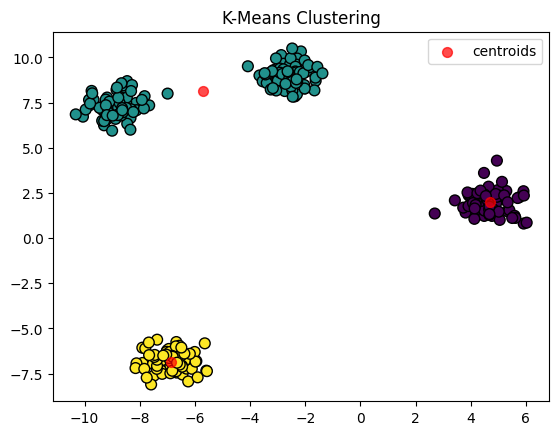

In [20]:
plt.scatter( X[:,0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=60)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.7, marker='.', label='centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
